![AES_744 Masthead](https://kyrill.ias.sdsmt.edu/wjc/eduresources/AES_519_Masthead.png)
# Unit-Fu and Projection-Fu with XArray and MetPy (MetPy V1.0 Edition).

## Intro

We plotted ONE product in projection space.  We will now try doing it with more than one!  

In this "Let's Play" session, we will explore the aspects of plotting graphics beyond the simple way that we've been doing it through the semester. 

One reason for this is that when one goes to the "online 'help,'" the examples that are often provided for "how to make a plot" for example tends to expect a user to jump in and intuit what is happening.

Add the more abstract concepts of looking at map projections and how they are managed in any kind of software and speaking for me, personally, this is an engraved invitation to rage quit, which I did -- more than once -- when transitioning to Python.  Therefore, in this session we are going to slow-roll the process of working with plots that have maps on them. 

This tutorial is not JUST about plotting meteorological or other geospaitial gridded data.  Here we are going to do some rudementary plotting of maps with nothing more than a few points and lines on top of them. 

## Prerequisite Nerd Skills

For this exercize to get started it's a good idea to have these skills under your belt.  

*  Introductory Plotting with Python.  For a review you can see the "Quick Start" Exercise Number 2 ([Session 2: Arrays, Math, and Plotting in Python (numpy and matplotlib)](https://wjcapehart.github.io/AES_CEE_Python/02%20Crash%20Course%20in%20Basic%20Python.html#session-2-arrays-math-and-plotting-in-python-numpy-and-matplotlib))
*  We'll also be needing a grip on working with Axes and other more advanced graphcis  structures, such as the [previous rage-quit session on working with axesesessess](https://wjcapehart.github.io/AES_CEE_Python/03%20Rage-Quit%20Explainers%20and%20Deep%20Dives.html#working-with-fancier-elements-of-matplotlib).
*  Finally there is the training [material above on basic mapping](https://wjcapehart.github.io/AES_CEE_Python/03%20Rage-Quit%20Explainers%20and%20Deep%20Dives.html#projecting-maps-not-psychological-in-python-and-trolling-flat-earthers) to get you startted with Cartopy.  And also on my Rage Quit Site is some more material that shows how to work with [satellite imagery](https://wjcapehart.github.io/AES_CEE_Python/03%20Rage-Quit%20Explainers%20and%20Deep%20Dives.html#displaying-satellite-imagery-features-animations) that you can incorporate into your own Scientific Adventure Violence!



## Libraries and Preparation

Let's start by loading up a set of libraries that we'll be working with today.

*  [NumPy](https://numpy.org): our library source arrays, matrices, and high-level math functions.
*  [Matplotlib](https://matplotlib.org): our 2-d plotting library.  

and some new ones:

* [Xarray](https://xarray.pydata.org/en/stable/): N-D labeled arrays and datasets in Python

* [MetPy](https://unidata.github.io/MetPy/latest/index.html): The Unidata Meteorological Python Toolkit
  
* [Cartopy](https://scitools.org.uk/cartopy/docs/latest/): A Geospatial Projection and Mapping Toolkit.
 
You should have these new ones but if not... try this in the notebook command pair.  
```
import sys as sys
!{sys.executable} -m pip install cartopy metpy xarray qgrid netCDF4 cfgrib cfunits bottleneck dask
```

for conda/anaconda you will MAY the following in your anaconda shell:

```
conda install -c conda-forge xarray dask netCDF4 bottleneck

```


In [1]:
##########################################################
#
# Library Calls.
#

# loading numpy

import numpy             as np

# loading matplotlib

import matplotlib.pyplot as plt

# loading xarray

import xarray            as xr

# Loading MetPy

import metpy             as metpy


# Loading Cartopy's Projection and 
#   Geospatial Dataset Plotting Features

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature


#
##########################################################

## Let's pick a forecast/analysis file!

We have plenty of datasets to get in our [THREDDS](https://kyrill.ias.sdsmt.edu:8080/thredds/catalog/catalog.html) repository.

Soe examples of opendap addresses are below.

Opendap Address (SDSMT):

```
https://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/CLASS_Examples/NAM_2020-11-11_12/nam_218_20201111_1200_012.grb2
```


Opendap Address (NOAA NCEI):

```
https://www.ncei.noaa.gov/thredds/dodsC/model-nam218/202011/20201111/nam_218_20201111_1200_012.grb2
```


Direct HTTP Download Address:  This is what you should probably use for now!

```
https://kyrill.ias.sdsmt.edu:8080/thredds/fileServer/CLASS_Examples/NAM_2020-11-11_12/nam_218_20201111_1200_012.grb2
```

This is a NAM Forecast and is also projected into WMO Projection [#218](https://www.nco.ncep.noaa.gov/pmb/docs/on388/tableb.html#GRID218). 




In [2]:
##########################################################
#
# Touching our NetCDF File
#

# local Netcdf copy example
#nam_file = "~/Downloads/nam_218_20201111_1200_012.grb2.nc"

# grabbing it Unidata's NAM files. (You can try both of these, noting that one is much coarser than the other).
nam_file = "https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/NAM/CONUS_12km/NAM_CONUS_12km_20221110_1200.grib2"

# grabbing it from NCDC/NCDI's TDS
#nam_file = "https://www.ncei.noaa.gov/thredds/dodsC/model-nam218/202011/20201111/nam_218_20201111_1200_012.grb2"

# grabbing it from Unidata's TDS
nam_file = "https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/NAM/CONUS_40km/conduit/NAM_CONUS_40km_conduit_20221115_1800.grib2"



ds = xr.open_dataset(nam_file)

display(ds)

#
##########################################################

<xarray.Dataset>
Dimensions:                                                                    (
                                                                                x: 614,
                                                                                y: 428,
                                                                                time: 29,
                                                                                time1: 28,
                                                                                height_above_ground: 1,
                                                                                ...
                                                                                pressure_difference_layer_bounds_1: 2,
                                                                                sigma_layer_bounds_1: 2,
                                                                                height_above_ground_layer_bounds_1: 2,
                                                                                pressure_difference_layer1_bounds_1: 2,
                                                                                pressure_difference_layer2_bounds_1: 2,
                                                                                isobaric_layer_bounds_1: 2)
Coordinates: (12/18)
  * x                                                                          (x) float32 ...
  * y                                                                          (y) float32 ...
    reftime                                                                    datetime64[ns] ...
  * time                                                                       (time) datetime64[ns] ...
  * time1                                                                      (time1) datetime64[ns] ...
  * height_above_ground                                                        (height_above_ground) float32 ...
    ...                                                                         ...
  * isobaric1                                                                  (isobaric1) float32 ...
  * pressure_difference_layer2                                                 (pressure_difference_layer2) float32 ...
  * height_above_ground2                                                       (height_above_ground2) float32 ...
  * isobaric_layer                                                             (isobaric_layer) float32 ...
  * hybrid                                                                     (hybrid) float32 ...
  * isobaric2                                                                  (isobaric2) float32 ...
Dimensions without coordinates: time1_bounds_1,
                                pressure_difference_layer_bounds_1,
                                sigma_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                isobaric_layer_bounds_1
Data variables: (12/67)
    LambertConformal_Projection                                                int32 ...
    time1_bounds                                                               (time1, time1_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                           (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    sigma_layer_bounds                                                         (sigma_layer, sigma_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                           (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    pressure_difference_layer1_bounds                                          (pressure_difference_layer1, pressure_difference_layer1_bounds_1) float32 ...
    ...                                 

## A closer look at the metadata 

Take a look at the above output.  You may or may not have a field of latitude and longitude. If not no worries.  The "x" and "y" dimensions in this grib dataset contain map eastings and northings coordinates.  They will also connect to the projection information that is sitting in the variable called above "LambertConformal_Projection."  

Those x and y and the projection data values aren't the original data and are integrated into the OPeNDAP interface to emulate NetCDF Access.  It's actually following most of the CF-Metadata standard protocals (you see it in the file attrubutes. 

This also gives is a beachead by which to work with the data for plotting, meteorological operations and unit conversions.  

## Getting Ready for MetPy

The good news is that rather than opening a gazzilion set of libraries, we can limit them to a few. 

For us the big one is [MetPy](https://unidata.github.io/MetPy/latest/index.html) from Unidata.  MetPy has integration not only with other unidata products like their UDUnits package but also can integrate with libraries like xarray, pandas, and cartoply.  

### Locking in the CF Metadata

If you aren't going through OPeNDAP to access grib data, you probably should run it through a filter to ensure that things will mesh well with the backage.  I recommend passing it through the "accessor," [metpy.xarray.MetPyDataArrayAccessor.parse_cf()](https://unidata.github.io/MetPy/latest/api/generated/metpy.xarray.html#accessors).  That resources is nice since it lets you also pull things like latitude and longitude arrays.

The *parse_cf* accessor will rewrite and append the dataset field to integrate CF-friendly fields.

In [3]:
##########################################################
# 
# Parsing our dataset geospatial address system into a 
#     more CF-Friendly environment.
#

ds = ds.metpy.parse_cf()

display(ds)

#
##########################################################

<xarray.Dataset>
Dimensions:                                                                    (
                                                                                time1: 28,
                                                                                time1_bounds_1: 2,
                                                                                pressure_difference_layer: 1,
                                                                                pressure_difference_layer_bounds_1: 2,
                                                                                sigma_layer: 1,
                                                                                ...
                                                                                height_above_ground2: 1,
                                                                                isobaric: 29,
                                                                                isobaric2: 25,
                                                                                height_above_ground1: 1,
                                                                                hybrid: 1,
                                                                                height_above_ground: 1)
Coordinates: (12/19)
    reftime                                                                    datetime64[ns] ...
  * time1                                                                      (time1) datetime64[ns] ...
  * pressure_difference_layer                                                  (pressure_difference_layer) float32 ...
  * sigma_layer                                                                (sigma_layer) float32 ...
  * height_above_ground_layer                                                  (height_above_ground_layer) float32 ...
  * pressure_difference_layer1                                                 (pressure_difference_layer1) float32 ...
    ...                                                                         ...
  * height_above_ground2                                                       (height_above_ground2) float32 ...
  * isobaric                                                                   (isobaric) float32 ...
  * isobaric2                                                                  (isobaric2) float32 ...
  * height_above_ground1                                                       (height_above_ground1) float32 ...
  * hybrid                                                                     (hybrid) float32 ...
  * height_above_ground                                                        (height_above_ground) float32 ...
Dimensions without coordinates: time1_bounds_1,
                                pressure_difference_layer_bounds_1,
                                sigma_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                isobaric_layer_bounds_1
Data variables: (12/67)
    LambertConformal_Projection                                                int32 ...
    time1_bounds                                                               (time1, time1_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                           (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    sigma_layer_bounds                                                         (sigma_layer, sigma_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                           (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    pressure_difference_layer1_bounds                                          (pressure_difference_layer1, pressure_difference_layer1_bounds_1) float32 ...
    ...                       

If you have a sharp eye you may notice a new field in the coordinates, "metpy_crs."  It contains a lot more data than is visible including a projection object.

In [4]:
##########################################################
# 
# Peeking at the CRS field.
#


display(ds.metpy_crs)


#
##########################################################

<xarray.DataArray 'metpy_crs' ()>
array(<metpy.plots.mapping.CFProjection object at 0x18bd75730>,
      dtype=object)
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic

## Let's pull some data.

Here we are going to pull some items to play with:

* Temperature at 2-m (in Kelvin - yeah, we're gonna do somthing about that)
* Mean Sea Level Pressure (in Pa - yeah, that too)
   *  But wait!  There are TWO versions of mean sea level pressure!  "Now how much would you pay!"
* Geopotential Isobaric Height at 500 hPa and 1000 hPa.

In [5]:
##########################################################
#
# Let's pull some data - and we're going to need to tag units
#
#   you will want to pull that single time coordinate out, too.
#

# Isobaric Height

vert_dim_name = ds["Geopotential_height_isobaric"].dims[1]
print("Geoptential Height Variable Name: ",vert_dim_name)
print((ds[vert_dim_name] ==  50000))

z_0500hpa_gpm = ds["Geopotential_height_isobaric"].isel(time=0)[(ds[vert_dim_name] ==  50000),:,:]
z_1000hpa_gpm = ds["Geopotential_height_isobaric"].isel(time=0)[(ds[vert_dim_name] == 100000),:,:]

display(z_1000hpa_gpm)

# Both MSLPs

mslp_Pa     = ds["Pressure_reduced_to_MSL_msl"].isel(time=0)
#mslp_eta_Pa = ds["MSLP_Eta_model_reduction_msl"].isel(time=0)

display(mslp_Pa)

# 2-m air Temperature

vert_dim_name = ds["Temperature_height_above_ground"].dims[1]
print("Temperature Height Above FGround: ", vert_dim_name)

t2m_degK    = ds["Temperature_height_above_ground"].isel(time=0)[(ds[vert_dim_name] == 2),:,:]

display(t2m_degK)
#
##########################################################

Geoptential Height Variable Name:  isobaric
<xarray.DataArray 'isobaric' (isobaric: 29)>
array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric   (isobaric) float32 1e+04 1.5e+04 2e+04 ... 9.5e+04 9.75e+04 1e+05


<xarray.DataArray 'Geopotential_height_isobaric' (isobaric: 1, y: 428, x: 614)>
[262792 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
  * x          (x) float32 -4.226e+06 -4.214e+06 ... 3.235e+06 3.247e+06
  * y          (y) float32 -8.327e+05 -8.205e+05 ... 4.361e+06 4.373e+06
    time       datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric   (isobaric) float32 1e+05
Attributes: (12/13)
    long_name:                       Geopotential height @ Isobaric surface
    units:                           gpm
    abbreviation:                    HGT
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-5_L100
    Grib2_Parameter:                 [0 3 5]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Geopotential height
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

<xarray.DataArray 'Pressure_reduced_to_MSL_msl' (y: 428, x: 614)>
[262792 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
  * x          (x) float32 -4.226e+06 -4.214e+06 ... 3.235e+06 3.247e+06
  * y          (y) float32 -8.327e+05 -8.205e+05 ... 4.361e+06 4.373e+06
    time       datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
Attributes: (12/13)
    long_name:                       Pressure reduced to MSL @ Mean sea level
    units:                           Pa
    abbreviation:                    PRMSL
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-1_L101
    Grib2_Parameter:                 [0 3 1]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Pressure reduced to MSL
    Grib2_Level_Type:                101
    Grib2_Level_Desc:                Mean sea level
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

Temperature Height Above FGround:  height_above_ground2


<xarray.DataArray 'Temperature_height_above_ground' (height_above_ground2: 1,
                                                     y: 428, x: 614)>
[262792 values with dtype=float32]
Coordinates:
    reftime               datetime64[ns] 2022-11-10T12:00:00
  * x                     (x) float32 -4.226e+06 -4.214e+06 ... 3.247e+06
  * y                     (y) float32 -8.327e+05 -8.205e+05 ... 4.373e+06
    time                  datetime64[ns] 2022-11-10T12:00:00
    metpy_crs             object Projection: lambert_conformal_conic
  * height_above_ground2  (height_above_ground2) float32 2.0
Attributes: (12/13)
    long_name:                       Temperature @ Specified height level abo...
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-0-0_L103
    Grib2_Parameter:                 [0 0 0]
    ...                              ...
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                103
    Grib2_Level_Desc:                Specified height level above ground
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

## "Unit-Fu, *with metadata!*"

(and yes you ***are*** going to experience what "drive in totals" are in class!)

One of the niftier things here is that this will manage units for you as well.  There are a number of "aquisitions" of the Unidata UdUnits.  But this is Unidata's so use this one. Best of all it's in MetPy so dollars to donuts, you're gonna get it loaded anyway.  

The downside is that the new version of MetPy will require you to correct the metadata so make sure of that.

Here you can add an extention to the your variables attributes as shown below.

Here is an example of how to implement it. Again, we use the same accessor as above.  But first remember that to copy your data to a new array valiue!

When done notice that it also patches your metadata!  That's important since MetPy has calculation routines on board.

In [6]:
##########################################################
#
# Units!
#

##  Temperature Units

print("2-m Air Temperature Before Unit Conversion")
display(t2m_degK[0, 0:10, 0])
print(" ")
print("  - - - - - - - - - - - -  ")
print(" ")



t2m_degF = t2m_degK.copy()

t2m_degF = t2m_degF.metpy.convert_units('degF')
 
t2m_degF.attrs["units"] = "degF"

print("2-m Air Temperature After Unit Conversion")
display(t2m_degF[0, 0:10, 0])
print(" ")
print(" ")
print("  =======================  ")
print(" ")
print(" ")

##  Pressure Units
print("Mean Sea Level Presssure Before Unit Conversion")
display(mslp_Pa[0:10, 0])
print(" ")
print("  - - - - - - - - - - - -  ")
print(" ")

#mslp_eta_hPa = mslp_eta_Pa.copy()
mslp_hPa     = mslp_Pa.copy()

#mslp_eta_hPa = mslp_eta_hPa.metpy.convert_units('hPa')
mslp_hPa     = mslp_hPa.metpy.convert_units('hPa')

#mslp_eta_hPa.attrs["units"] = "hPa"
mslp_hPa.attrs["units"] = "hPa"


print("Mean Sea Level Presssure After Unit Conversion")
display(mslp_hPa[0:10, 0])
print(" ")
print(" ")
print("  =======================  ")
print(" ")
print(" ")

#
##########################################################

2-m Air Temperature Before Unit Conversion


<xarray.DataArray 'Temperature_height_above_ground' (y: 10)>
[10 values with dtype=float32]
Coordinates:
    reftime               datetime64[ns] 2022-11-10T12:00:00
    x                     float32 -4.226e+06
  * y                     (y) float32 -8.327e+05 -8.205e+05 ... -7.23e+05
    time                  datetime64[ns] 2022-11-10T12:00:00
    metpy_crs             object Projection: lambert_conformal_conic
    height_above_ground2  float32 2.0
Attributes: (12/13)
    long_name:                       Temperature @ Specified height level abo...
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-0-0_L103
    Grib2_Parameter:                 [0 0 0]
    ...                              ...
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                103
    Grib2_Level_Desc:                Specified height level above ground
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

 
  - - - - - - - - - - - -  
 
2-m Air Temperature After Unit Conversion


<xarray.DataArray 'Temperature_height_above_ground' (y: 10)>
<Quantity([77.95398  77.95398  77.93602  77.93602  77.918    77.89999  77.845985
 77.845985 77.845985 77.864006], 'degree_Fahrenheit')>
Coordinates:
    reftime               datetime64[ns] 2022-11-10T12:00:00
    x                     float32 -4.226e+06
  * y                     (y) float32 -8.327e+05 -8.205e+05 ... -7.23e+05
    time                  datetime64[ns] 2022-11-10T12:00:00
    metpy_crs             object Projection: lambert_conformal_conic
    height_above_ground2  float32 2.0
Attributes: (12/13)
    long_name:                       Temperature @ Specified height level abo...
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-0-0_L103
    Grib2_Parameter:                 [0 0 0]
    Grib2_Parameter_Discipline:      Meteorological products
    ...                              ...
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                103
    Grib2_Level_Desc:                Specified height level above ground
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1
    units:                           degF

 
 
 
 
Mean Sea Level Presssure Before Unit Conversion


<xarray.DataArray 'Pressure_reduced_to_MSL_msl' (y: 10)>
[10 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
    x          float32 -4.226e+06
  * y          (y) float32 -8.327e+05 -8.205e+05 ... -7.352e+05 -7.23e+05
    time       datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
Attributes: (12/13)
    long_name:                       Pressure reduced to MSL @ Mean sea level
    units:                           Pa
    abbreviation:                    PRMSL
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-1_L101
    Grib2_Parameter:                 [0 3 1]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Pressure reduced to MSL
    Grib2_Level_Type:                101
    Grib2_Level_Desc:                Mean sea level
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

 
  - - - - - - - - - - - -  
 
Mean Sea Level Presssure After Unit Conversion


<xarray.DataArray 'Pressure_reduced_to_MSL_msl' (y: 10)>
<Quantity([1013.0585  1013.08246 1013.11285 1013.1529  1013.21045 1013.28406
 1013.34326 1013.38965 1013.4377  1013.48724], 'hectopascal')>
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
    x          float32 -4.226e+06
  * y          (y) float32 -8.327e+05 -8.205e+05 ... -7.352e+05 -7.23e+05
    time       datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
Attributes: (12/13)
    long_name:                       Pressure reduced to MSL @ Mean sea level
    abbreviation:                    PRMSL
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-1_L101
    Grib2_Parameter:                 [0 3 1]
    Grib2_Parameter_Discipline:      Meteorological products
    ...                              ...
    Grib2_Parameter_Name:            Pressure reduced to MSL
    Grib2_Level_Type:                101
    Grib2_Level_Desc:                Mean sea level
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1
    units:                           hPa

## Making Derived Fields (with Metadata Corrections)

You also can derived fields such as the difference between the two fields.  And notice what we can do with the metadata.  Do this bit by bit:  The coordinates will transfer but the attributes don't :-(  So you will have to customize the important ones like names and units.

Put a pin in the use of the brackets, BTW...

In [7]:
###################################################
#
# Making Derived Fields
#

#  Delta_MSLP_using Eta and the Default

# diff_mslp_hPa = (mslp_eta_Pa - mslp_Pa) 

# display(diff_mslp_hPa)

# Fix the metadata

# diff_mslp_hPa.attrs["units"]         = "hPa"
# diff_mslp_hPa.attrs["long_name"]     = "Eta-Default MSLP"
# diff_mslp_hPa.attrs["grid_mapping"]  = "LambertConformal_Projection"

# display(diff_mslp_hPa)

#
###################################################

In [8]:
###################################################
#
# Making Derived Fields
#

#  Isobaric Level Thickness

display(z_0500hpa_gpm)
display(z_1000hpa_gpm)

thickness_1000_500_gpm                        = (z_0500hpa_gpm[0,:,:] - z_1000hpa_gpm[0,:,:])

thickness_1000_500_gpm.attrs["units"]         = "gpm"
thickness_1000_500_gpm.attrs["long_name"]     = "1000-500-hPa Thickness"
thickness_1000_500_gpm.attrs["grid_mapping"]  = "LambertConformal_Projection"

display(thickness_1000_500_gpm)

#
###################################################

<xarray.DataArray 'Geopotential_height_isobaric' (isobaric: 1, y: 428, x: 614)>
[262792 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
  * x          (x) float32 -4.226e+06 -4.214e+06 ... 3.235e+06 3.247e+06
  * y          (y) float32 -8.327e+05 -8.205e+05 ... 4.361e+06 4.373e+06
    time       datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric   (isobaric) float32 5e+04
Attributes: (12/13)
    long_name:                       Geopotential height @ Isobaric surface
    units:                           gpm
    abbreviation:                    HGT
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-5_L100
    Grib2_Parameter:                 [0 3 5]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Geopotential height
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

<xarray.DataArray 'Geopotential_height_isobaric' (isobaric: 1, y: 428, x: 614)>
[262792 values with dtype=float32]
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
  * x          (x) float32 -4.226e+06 -4.214e+06 ... 3.235e+06 3.247e+06
  * y          (y) float32 -8.327e+05 -8.205e+05 ... 4.361e+06 4.373e+06
    time       datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
  * isobaric   (isobaric) float32 1e+05
Attributes: (12/13)
    long_name:                       Geopotential height @ Isobaric surface
    units:                           gpm
    abbreviation:                    HGT
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-3-5_L100
    Grib2_Parameter:                 [0 3 5]
    ...                              ...
    Grib2_Parameter_Category:        Mass
    Grib2_Parameter_Name:            Geopotential height
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

<xarray.DataArray 'Geopotential_height_isobaric' (y: 428, x: 614)>
array([[5746.378 , 5746.25  , 5746.01  , ..., 5771.898 , 5772.042 ,
        5771.7695],
       [5746.0737, 5745.978 , 5745.85  , ..., 5771.258 , 5771.338 ,
        5771.258 ],
       [5745.738 , 5745.706 , 5745.53  , ..., 5770.714 , 5770.714 ,
        5770.6816],
       ...,
       [5279.738 , 5277.914 , 5276.186 , ..., 5139.546 , 5141.066 ,
        5142.474 ],
       [5279.594 , 5277.818 , 5276.0903, ..., 5139.738 , 5141.178 ,
        5142.554 ],
       [5279.4976, 5277.7217, 5275.994 , ..., 5139.674 , 5141.082 ,
        5142.426 ]], dtype=float32)
Coordinates:
    reftime    datetime64[ns] 2022-11-10T12:00:00
  * x          (x) float32 -4.226e+06 -4.214e+06 ... 3.235e+06 3.247e+06
  * y          (y) float32 -8.327e+05 -8.205e+05 ... 4.361e+06 4.373e+06
    time       datetime64[ns] 2022-11-10T12:00:00
    metpy_crs  object Projection: lambert_conformal_conic
Attributes:
    units:         gpm
    long_name:     1000-500-hPa Thickness
    grid_mapping:  LambertConformal_Projection

## Now about that bracket we used above!

The people who created the cf-metadata conversions between GRIB to NetCDF did something very very very bad.

Review the dataset inventory above for the u- and v-components of the wind for 10-m winds.

*  u-component_of_wind_height_above_ground
*  v-component_of_wind_height_above_ground



In [9]:
###################################################
#
# Getting U-wind and V-wind
#

vert_dim_name = ds["u-component_of_wind_height_above_ground"].dims[1]
print(vert_dim_name)

u10m_mps = ds["u-component_of_wind_height_above_ground"].isel(time=0)[(ds[vert_dim_name] ==  10),:,:]
v10m_mps = ds["v-component_of_wind_height_above_ground"].isel(time=0)[(ds[vert_dim_name] ==  10),:,:]


u10m_kts = u10m_mps.copy()
u10m_kts = u10m_mps.metpy.convert_units('kts')

v10m_kts = v10m_mps.copy()
v10m_kts = v10m_mps.metpy.convert_units('kts')

u10m_kts.attrs["units"]         = "knots"
v10m_kts.attrs["units"]         = "knots"


display(u10m_kts)

#
###################################################

height_above_ground


<xarray.DataArray 'u-component_of_wind_height_above_ground' (
                                                             height_above_ground: 1,
                                                             y: 428, x: 614)>
<Quantity([[[-13.315334 -13.529158 -13.742981 ... -12.732182 -12.965443 -13.023757]
  [-13.23758  -13.412527 -13.62635  ... -12.673865 -12.926566 -13.082073]
  [-13.23758  -13.37365  -13.568034 ... -12.537796 -12.829373 -13.101511]
  ...
  [ 12.809936  12.907126  12.946004 ...  21.207342  20.954643  20.799135]
  [ 12.751619  12.809936  12.809936 ...  20.585314  20.390928  20.274298]
  [ 12.693305  12.712743  12.654428 ...  20.021599  19.846651  19.885529]]], 'knot')>
Coordinates:
    reftime              datetime64[ns] 2022-11-10T12:00:00
  * x                    (x) float32 -4.226e+06 -4.214e+06 ... 3.247e+06
  * y                    (y) float32 -8.327e+05 -8.205e+05 ... 4.373e+06
    time                 datetime64[ns] 2022-11-10T12:00:00
    metpy_crs            object Projection: lambert_conformal_conic
  * height_above_ground  (height_above_ground) float32 10.0
Attributes: (12/13)
    long_name:                       u-component of wind @ Specified height l...
    abbreviation:                    UGRD
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_0-2-2_L103
    Grib2_Parameter:                 [0 2 2]
    Grib2_Parameter_Discipline:      Meteorological products
    ...                              ...
    Grib2_Parameter_Name:            u-component of wind
    Grib2_Level_Type:                103
    Grib2_Level_Desc:                Specified height level above ground
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1
    units:                           knots

## Now Let's Plot

Let's go back to where we left off with plotting.  We can start with one field.

We're also going to use the extensions to plotting inside of Xarray similar to what you can do in Pandas.

This is an example of using the [xarray.plot](https://xarray.pydata.org/en/v0.7.1/plotting.html) extensions.

You can use a color map of your choice found here.  https://matplotlib.org/3.3.2/gallery/color/colormap_reference.html

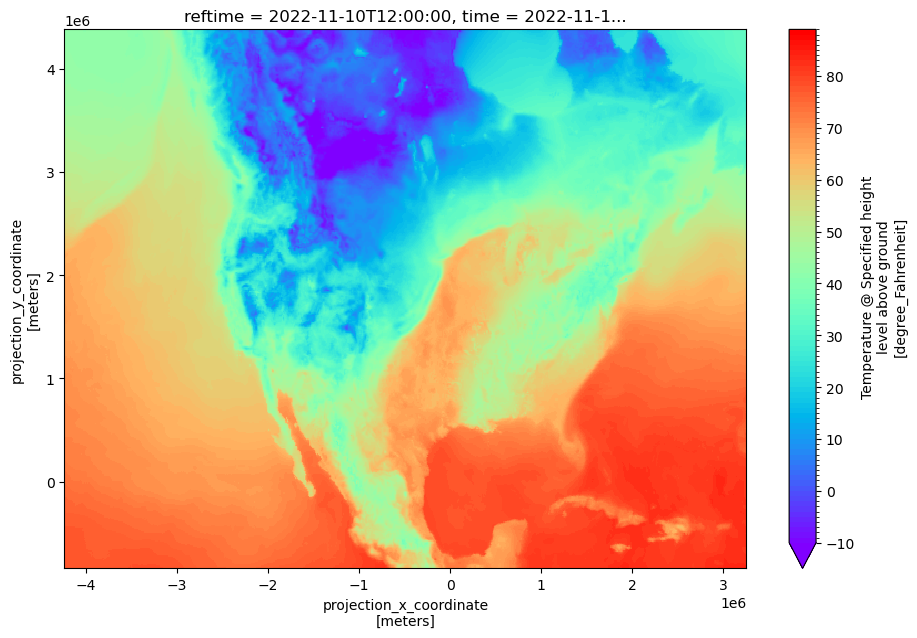

In [10]:
###################################################
#
# Quick Plot
#

# pre-set your own plotting levels

t2m_degF_levels = np.arange(-10,90,1)

# make me bigger than the default. #(just use fig!)

plt.rcParams['figure.figsize'] = (11, 7)

# make a simple plot of the array using imshow's raster plot option.

contourplot = t2m_degF[0,:,:].plot.imshow(cmap   = plt.cm.rainbow,
                                   levels = t2m_degF_levels)

plt.show()

#
###################################################

Here is where those projections come to play!  The center point (where both the eastings and northings are zero) are 0 in this dataset are at the declared center of the projection.

Let's take a peak again at that "crs" field.  This time using metpy resources (that, in turn, source resources in cartopy)

In [11]:
###################################################
#
# let's peek at the crs through metpy's cartopy's interface 
#

data_crs = ds.metpy_crs.metpy.cartopy_crs


display("data_crs.proj4_init",   data_crs.proj4_init)
display("data_crs.proj4_params", data_crs.proj4_params)

display(data_crs)

#
###################################################

'data_crs.proj4_init'

'+ellps=sphere +a=6371229.0 +b=6371229.0 +proj=lcc +lon_0=265.0 +lat_0=25.0 +x_0=0.0 +y_0=0.0 +lat_1=25.0 +no_defs'

'data_crs.proj4_params'

{'ellps': 'sphere',
 'a': 6371229.0,
 'b': 6371229.0,
 'proj': 'lcc',
 'lon_0': 265.0,
 'lat_0': 25.0,
 'x_0': 0.0,
 'y_0': 0.0,
 'lat_1': 25.0}

<Derived Projected CRS: +proj=lcc +ellps=sphere +a=6371229.0 +b=6371229.0  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Conic Conformal (1SP)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

The projection information doesn't have the bounds we need -- but that's what the northings and eastings are for.

### Integrating the Cartopy Projection with MetPy's Eastings and Northings

MathplotLib can access [geographic projection information](https://matplotlib.org/3.2.1/api/projections_api.html).  We only need to merge projection with the eastings and northings.  We can do this with the cartopy_crs data. 

Doing this on your own, just do one line at a time to see how this comes together.

Basically each step builds on the other until you drop the image with plot.show()



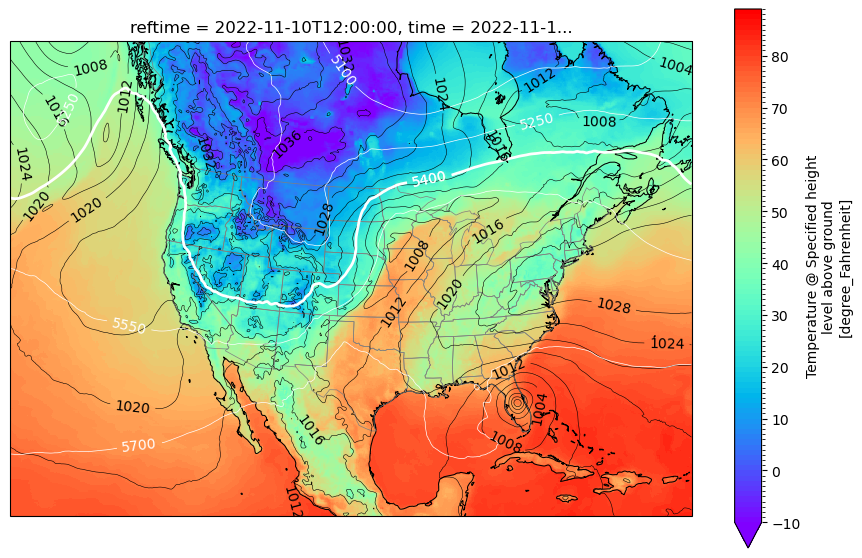

In [12]:
###################################################
#
# Integrating a projection data to our image data.
#

# make a figure space 

fig = plt.figure(figsize=(11, 7))

# add a plot element just one field

                   # nrows, ncols, index [which oddly starts with one (go fig)],
ax = fig.add_subplot(    1,     1,     1, 
                     projection = data_crs)

# of you use the coastlines and add_feature you can see it does 
#   the full cone and our place on it


ax.coastlines(resolution = 'auto',
              linewidths =  0.75)


ax.add_feature(feature    = cfeature.STATES.with_scale('110m'), 
               linewidths = 0.5,
               facecolor  = 'none', 
               edgecolor  = 'tab:gray')

#ax.gridlines(draw_labels=True)

# here is our plot from above.

t2m_degF_levels = np.arange(start = -10,
                            stop  =  90,
                            step  =   1)

contourplot = t2m_degF[0,:,:].plot.imshow(cmap   = plt.cm.rainbow,
                                   levels = t2m_degF_levels)

# and pow this will give us our mapping.

# Let's overlay our pressure contours.

mslp_contour_levels = np.arange(start =  800,
                                stop  = 1200,
                                step  =    4)

contourplot = mslp_hPa.plot.contour(colors     = "black",
                                     linewidths = 0.4,
                                     levels     = mslp_contour_levels)

plt.clabel(CS     = contourplot, 
           levels = contourplot.levels, 
           fmt    = '%d')


contourplot_thick = thickness_1000_500_gpm[:,:].plot.contour(colors="white",
                                                             linewidths = 0.5)

plt.clabel(CS     = contourplot_thick, 
           levels = contourplot_thick.levels, 
           fmt    = '%d')

contourplot_thick2 = thickness_1000_500_gpm[:,:].plot.contour(colors="white",
                                                             linewidths = 2.0,
                                                          levels = np.array([0,5400.,999999]))

plt.clabel(CS     = contourplot_thick2, 
           levels = contourplot_thick2.levels, 
           fmt    = '%d')


plt.show()

#
###################################################

# But Wait!  There's More!  Working with Multiple Projections at once!

Now with this product we will try something else.

For this we will fetch some satellite data from the [thredds.ucar.edu](https://thredds.ucar.edu/thredds) services and grab a satellite image.

These files are NetCDF files and can be cracked and accessed similarly to our model output - including accessing parsing the file for cf-metadata standards and our projection information!

In [13]:
################################################################
#
# Crack a Satellite File!
#

#
# Satellite File URL
#

sat_file = "https://thredds.ucar.edu/thredds/dodsC/satellite/goes/east/products/CloudAndMoistureImagery/Mesoscale-1/Channel03/20221110/OR_ABI-L2-CMIPM1-M6C03_G16_s20223141200280_e20223141200280_c20223141200280.nc"

#
# Crack Open NetCDF
#

xrs = xr.open_dataset(sat_file) # Open Dataset
xrs = xrs.metpy.parse_cf()      # Parse Dataset w/ metpy

display(xrs)

#
################################################################

<xarray.Dataset>
Dimensions:               (y: 1000, x: 1000)
Coordinates:
    time                  datetime64[ns] 2022-11-10T12:00:28
  * y                     (y) float64 3.326e+06 3.325e+06 ... 2.325e+06
  * x                     (x) float64 -8.813e+05 -8.803e+05 ... 1.197e+05
    metpy_crs             object Projection: geostationary
Data variables:
    fixedgrid_projection  int32 ...
    Sectorized_CMI        (y, x) float32 ...
Attributes: (12/31)
    _NCProperties:               version=1|netcdflibversion=4.6.1|hdf5libvers...
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  3
    central_wavelength:          0.865
    ...                          ...
    pixel_y_size:                1.0
    satellite_latitude:          0.0
    satellite_longitude:         -75.0
    satellite_altitude:          35786023.0
    created_by:                  ldm-alchemy
    product_tiles_received:      1

We can also pull our projection data using the same resources as with our model output.

In [14]:
################################################################
#
# Satellite CRS Projection Information 
#

sat_crs   = xrs.metpy_crs.metpy.cartopy_crs
sat_proj4 = sat_crs.to_proj4()
display(sat_crs)
print(sat_proj4)

#
################################################################

/opt/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


<Derived Projected CRS: +proj=geos +a=6378137.0 +b=6356752.31414 +lon_0=-7 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: unknown
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

+proj=geos +a=6378137.0 +b=6356752.31414 +lon_0=-75.00000000000001 +lat_0=0.0 +h=35786023.0 +x_0=0 +y_0=0 +units=m +sweep=x +no_defs +type=crs


We can now extract our satellite image and also our "eastings" and "norhting" (our projection's x and y coordinates)

In [15]:
################################################################
#
# Extract Data, Eastings and Northings
# 

sat_data = xrs.Sectorized_CMI

# Eastings and Northings

x = xrs["x"]
y = xrs["y"]

#
# Display Values for Reference
#

print("Satellite Data Field")
display(sat_data)

print(" ")
print("Eastings")
display(x)

print(" ")
print("Northings")
display(y)

#
################################################################

Satellite Data Field


<xarray.DataArray 'Sectorized_CMI' (y: 1000, x: 1000)>
[1000000 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2022-11-10T12:00:28
  * y          (y) float64 3.326e+06 3.325e+06 3.324e+06 ... 2.326e+06 2.325e+06
  * x          (x) float64 -8.813e+05 -8.803e+05 ... 1.187e+05 1.197e+05
    metpy_crs  object Projection: geostationary
Attributes:
    standard_name:                                          toa_bidirectional...
    units:                                                  1
    grid_mapping:                                           fixedgrid_projection
    valid_min:                                              0
    valid_max:                                              4095
    percent_good_pixel_qf:                                  1.0
    percent_conditionally_usable_pixel_qf:                  0.0
    percent_out_of_range_pixel_qf:                          0.0
    percent_no_value_pixel_qf:                              0.0
    percent_focal_plane_temperature_threshold_exceeded_qf:  0.0
    maximum_focal_plane_temperature:                        -999.0
    _ChunkSizes:                                            [1000 1000]

 
Eastings


<xarray.DataArray 'x' (x: 1000)>
array([-881266.602153, -880264.593509, -879262.584865, ...,  117736.015915,
        118738.024559,  119740.033203])
Coordinates:
    time       datetime64[ns] 2022-11-10T12:00:28
  * x          (x) float64 -8.813e+05 -8.803e+05 ... 1.187e+05 1.197e+05
    metpy_crs  object Projection: geostationary
Attributes:
    standard_name:  projection_x_coordinate
    units:          meter

 
Northings


<xarray.DataArray 'y' (y: 1000)>
array([3326167.746315, 3325165.737671, 3324163.729027, ..., 2327165.128247,
       2326163.119603, 2325161.110959])
Coordinates:
    time       datetime64[ns] 2022-11-10T12:00:28
  * y          (y) float64 3.326e+06 3.325e+06 3.324e+06 ... 2.326e+06 2.325e+06
    metpy_crs  object Projection: geostationary
Attributes:
    standard_name:  projection_y_coordinate
    units:          meter

... and we can take a peak at the distribtuion of the data.

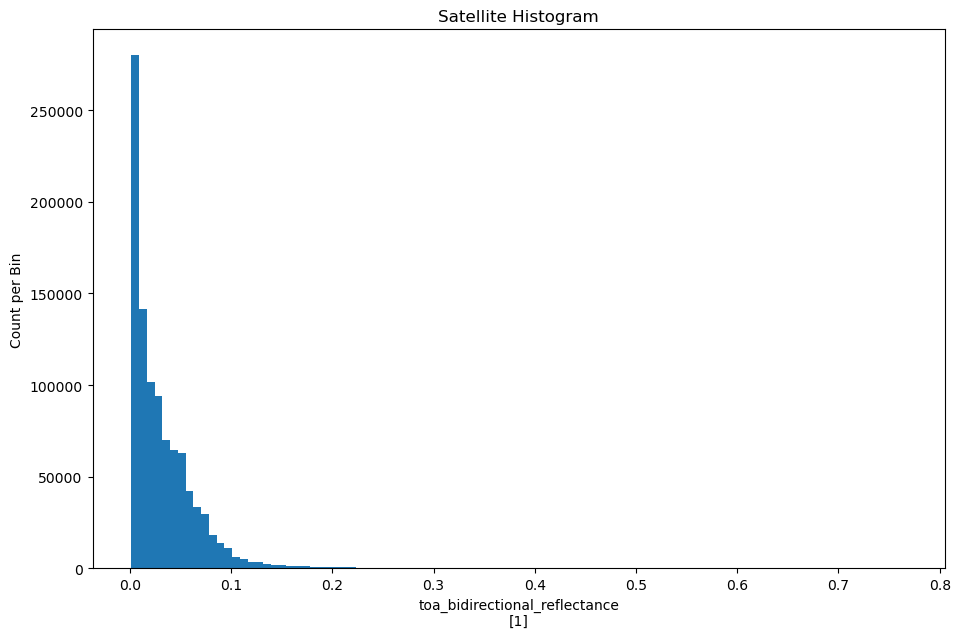

In [16]:
################################################################
#
# Plot a Histogram
#


# Make a Histogram

sat_data.plot.hist(bins=100)
plt.title("Satellite Histogram")
plt.ylabel("Count per Bin")
plt.show()

#
################################################################

As you can see, the image is pretty dark (it's at 12Z on the eastern seaboard) and in fairness even in clear conditions, our planetary albedo is rather low (e.g., 30%)  

This is reinforced if we quickly plot our image.

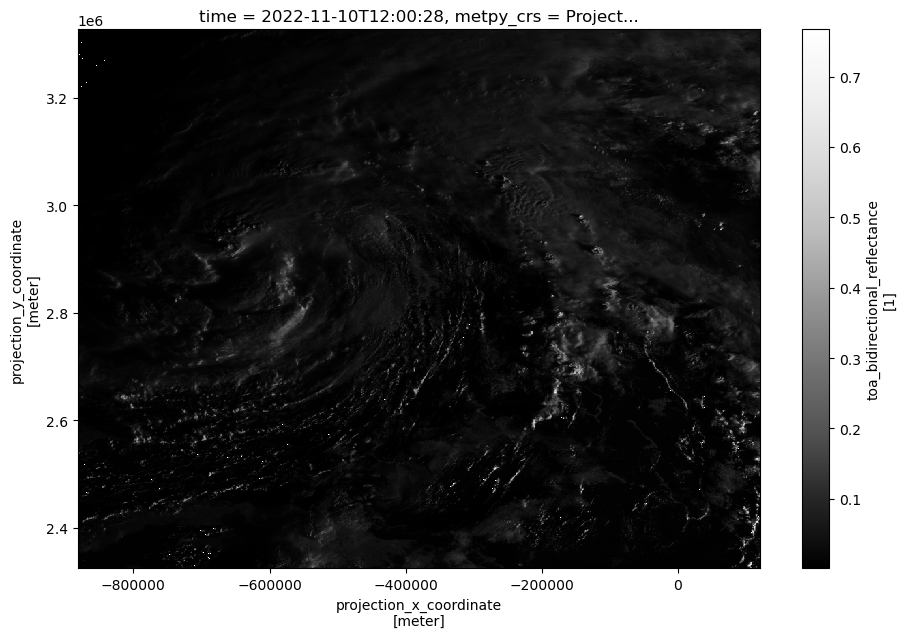

In [17]:
################################################################
#
# Quickly plot the image.
#

sat_data.plot(cmap=plt.cm.Greys_r)
plt.show()

#
################################################################

There are a couple of strategies we can use to "stretch" our data.  Common approches are to square root or log the data.

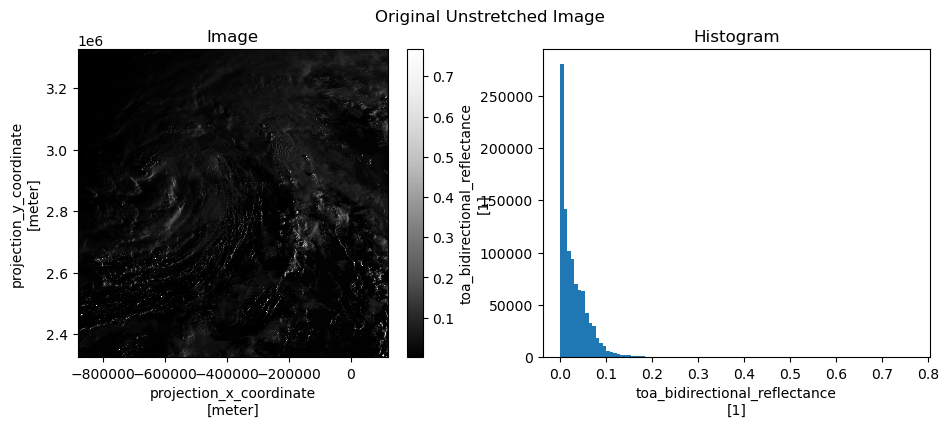

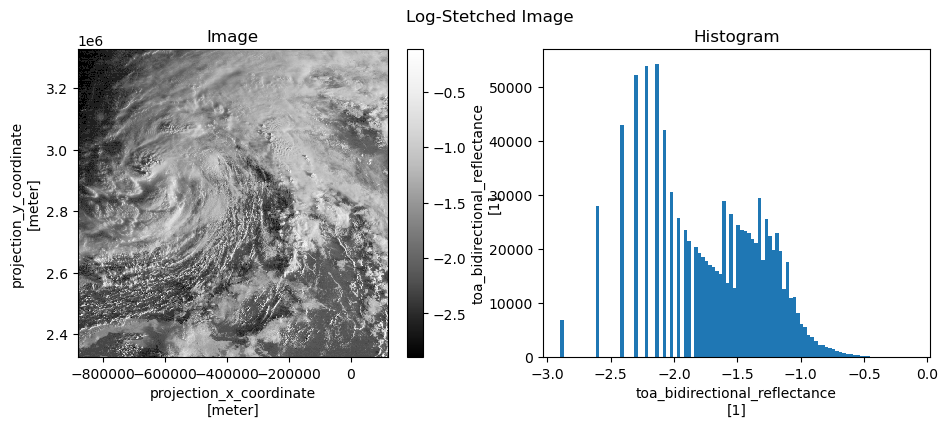

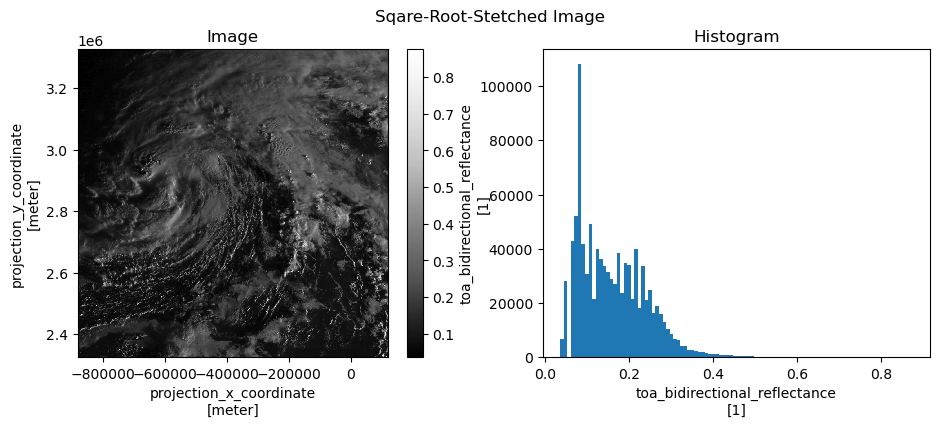

In [18]:
################################################################
#
# Common Comparative Stretches
#

#
# Calculate Log and Sqrt Stretches
#

sat_log_stretch  = np.log10( sat_data)
sat_sqrt_stretch = np.sqrt(sat_data)


#
# Original Plot and Histogram
#

fig, ax = plt.subplots(nrows = 1,
                       ncols = 2,
                       figsize = (11,4))

sat_data.plot(cmap = plt.cm.Greys_r,
              ax   =          ax[0])

sat_data.plot.hist(bins =   100,
                   ax   = ax[1])

plt.suptitle("Original Unstretched Image")
ax[0].set_title("Image")
ax[1].set_title("Histogram")

plt.show()

#
# Log Stetch Image and Histogram
#

fig, ax = plt.subplots(nrows = 1,
                       ncols = 2,
                       figsize = (11,4))

sat_log_stretch.plot(cmap = plt.cm.Greys_r,
                     ax   =          ax[0])

sat_log_stretch.plot.hist(bins =   100,
                          ax   = ax[1])

plt.suptitle("Log-Stetched Image")
ax[0].set_title("Image")
ax[1].set_title("Histogram")

plt.show()

#
# Square Root Stetch Image and Histogram
#

fig, ax = plt.subplots(nrows = 1,
                       ncols = 2,
                       figsize = (11,4))

sat_sqrt_stretch.plot(cmap = plt.cm.Greys_r,
                      ax   =          ax[0])

sat_sqrt_stretch.plot.hist(bins =   100,
                           ax   = ax[1])

plt.suptitle("Sqare-Root-Stetched Image")
ax[0].set_title("Image")
ax[1].set_title("Histogram")

plt.show()

#
################################################################

So with the above iamge, let's use the Log-Stretched Image and make it pretty (though the colors aren't thrilling me!)

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


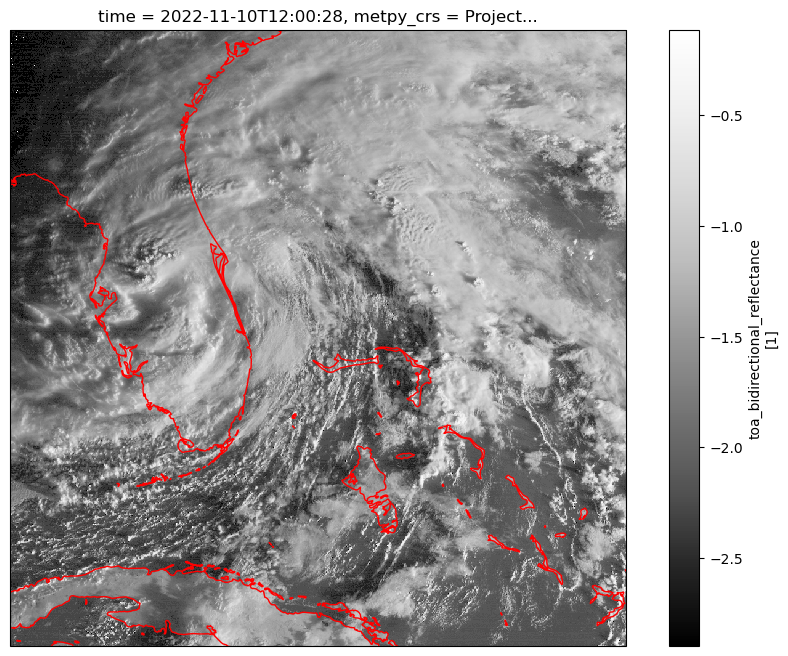

In [19]:
################################################################
#
# Plot Our Satellite Image with a Map Background.
#

fig = plt.figure(figsize=(11,8))
ax  = fig.add_subplot(1,1,1, 
                      projection=sat_crs)

sat_log_stretch.plot(cmap=plt.cm.Greys_r)

ax.add_feature(feature = cfeature.COASTLINE, 
               color   =              "red")

plt.show()

#
################################################################

So now we have a satellite image... and above we have model output.  So the question is, can we merge the two.  

Actually we can, as long as we explicitly cite the projection.

For our subplot we declare the subplot's *projection*, and for our data we use it's own projection to *transform* it to our product's map projection.

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


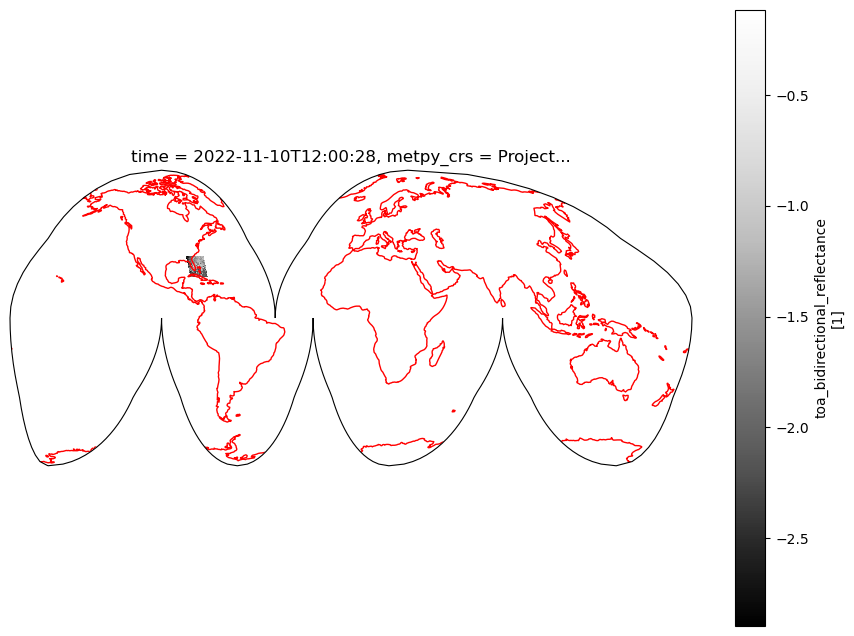

In [20]:
################################################################
#
# Plot Our Satellite Image on an Alternative Projection
#

fig = plt.figure(figsize=(11,8))
ax  = fig.add_subplot(1,1,1, 
                      projection=ccrs.InterruptedGoodeHomolosine())

sat_log_stretch.plot(cmap      = plt.cm.Greys_r,
                     transform = sat_crs)

ax.add_feature(feature = cfeature.COASTLINE, 
               color   =              "red")

ax.set_global()

plt.show()

#
################################################################

And there is no reason we can't put multiple datasets with different projections on top of our map.

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


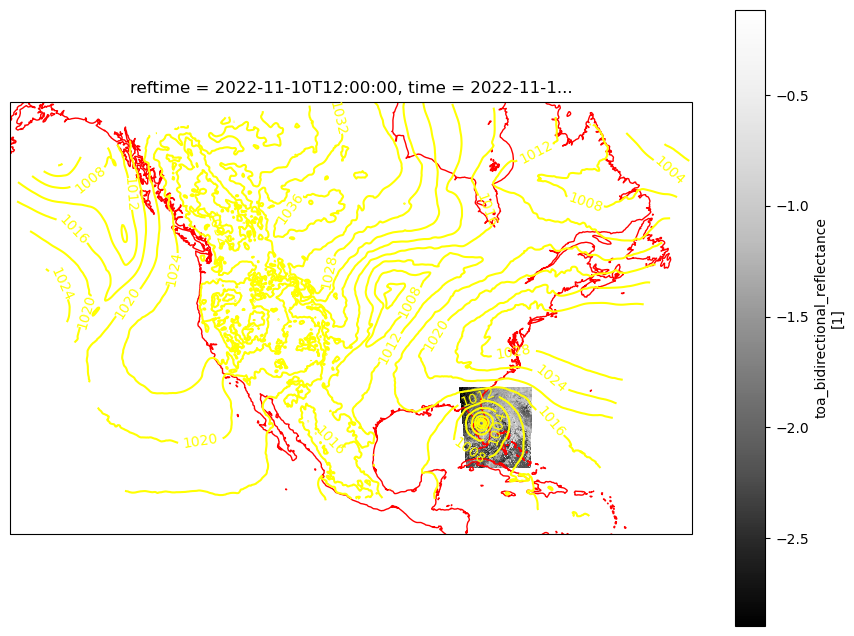

In [21]:
################################################################
#
# Plot Our Satellite Image with a Map Background.
#

fig = plt.figure(figsize=(11,8))
ax  = fig.add_subplot(1,1,1, 
                      projection=ccrs.Mercator())

hi_res_pres_contours = np.arange(start =  800,
                                 stop  = 1200,
                                 step  =    4)

sat_log_stretch.plot(cmap      = plt.cm.Greys_r,
                     transform =        sat_crs)

ax.add_feature(feature = cfeature.COASTLINE, 
               color   =              "red")

pres_sat_hpa = mslp_hPa.plot.contour(transform = data_crs,
                                     levels    = hi_res_pres_contours,
                                     colors    = "yellow")

plt.clabel(CS     =        pres_sat_hpa, 
           levels = pres_sat_hpa.levels, 
           fmt    =                '%d')

plt.show()

#
################################################################

But probably may want to just limut our domain to one of our datasets' projection. (Keep your maps as uneyebleeding as possible.

/opt/miniconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


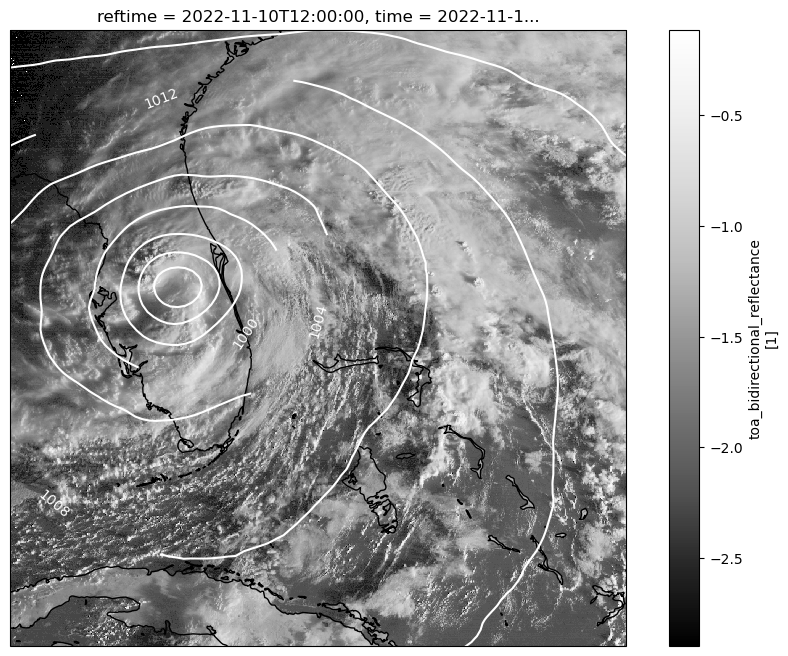

In [22]:
################################################################
#
# Plot Our Satellite Image with a Map Background.
#

fig = plt.figure(figsize=(11,8))

ax  = fig.add_subplot(1,1,1, 
                      projection=sat_crs)

hi_res_pres_contours = np.arange(start =  800,
                                 stop  = 1200,
                                 step  =    4)

sat_log_stretch.plot(cmap      = plt.cm.Greys_r)

ax.add_feature(feature = cfeature.COASTLINE, 
               color   =              "black")

pres_sat_hpa = mslp_hPa.plot.contour(transform =             data_crs,
                                     levels    = hi_res_pres_contours,
                                     colors    =             "white")

plt.clabel(CS     =        pres_sat_hpa, 
           levels = pres_sat_hpa.levels, 
           fmt    =                '%d')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()



#
################################################################

# Version Information
Install the Version_Information tool from GitHub

There was once a very handy tool that would print version information of the Python version, operating system, and the versions of the Python packages you are running.

The developer has moved on to other things but it still has a narrow but ~militant~ ernest fan base (myself included). The original isn't doesn't work with versions of Python above 3.7. So a couple of us wrote some patches to fix it. You can access my version below following these instructions.

1.  If you don't have GIT on your rig yet, you can fetch it from git

```
!conda install -y -v git
```

2.  You can pip it in using the following command.  

```
!pip install git+https://github.com/wjcapehart/version_information 
```

In [23]:
################################################################
#
# Loading Version Information
#
# You need git for this.

#

%load_ext version_information
%version_information version_information, numpy, metpy, matplotlib, cartopy

#
################################################################

Software versions
Python 3.9.13 64bit [Clang 13.0.1 ]
IPython 8.6.0
OS macOS 13.0.1 x86_64 i386 64bit
version_information 1.0.3
numpy 1.23.4
metpy 1.3.1
matplotlib 3.6.2
cartopy 0.21.0
Tue Nov 15 14:21:46 2022 MST